# Report03 - Nathan Yee

This notebook contains report03 for computational baysian statistics fall 2016

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

## The sock problem

Created by Yuzhong Huang

There are two drawers of socks. The first drawer has 40 white socks and 10 black socks; the second drawer has 20 white socks and 30 black socks. We randomly get 2 socks from a drawer, and it turns out to be a pair(same color) but we don't know the color of these socks. What is the chance that we picked the first drawer.

To make calculating our likelihood easier, we start by defining a multiply function. The function is written in a functional way primarily for fun.

In [2]:
from functools import reduce
import operator

def multiply(items):
    """
    multiply takes a list of numbers, multiplies all of them, and returns the result
    
    Args:
        items (list): The list of numbers
        
    Return:
        the items multiplied together
    """
    return reduce(operator.mul, items, 1)

Next we define a drawer suite. This suite will allow us to take n socks up to the least number of socks in a drawer. To make our likelihood function simpler, we ignore the case where we take 11 black socks and that only drawer 2 is possible.

In [3]:
class Drawers(Suite):
    def Likelihood(self, data, hypo):
        """
        Likelihood returns the likelihood given a bayesian update 
        consisting of a particular hypothesis and new data. In the
        case of our drawer problem, the probabilities change with the
        number of pairs we take (without replacement) so we we start
        by defining lists for each color sock in each drawer.
        
        Args:
            data (int): The number of socks we take
            hypo (str): The hypothesis we are updating
            
        Return:
            the likelihood for a hypothesis
        """
        
        drawer1W = []
        drawer1B = []
        drawer2W = []
        drawer2B = []
        for i in range(data):
            drawer1W.append(40-i)
            drawer1B.append(10-i)
            drawer2W.append(20-i)
            drawer2B.append(30-i)
        
        if hypo == 'drawer1':
            return multiply(drawer1W)+multiply(drawer1B)
        if hypo == 'drawer2':
            return multiply(drawer2W)+multiply(drawer2B)


Next, define our hypotheses and create the drawer Suite.

In [4]:
hypos = ['drawer1','drawer2']
drawers = Drawers(hypos)
drawers.Print()

drawer1 0.5
drawer2 0.5


Next, update the drawers by taking two matching socks.

In [5]:
drawers.Update(2)
drawers.Print()

drawer1 0.5689655172413792
drawer2 0.43103448275862066


It seems that the drawer with many of a single sock (40 white 10 black) is more likely after the update. To confirm this suspicion, let's restart the problem by taking 5 pairs of socks.

In [6]:
hypos = ['drawer1','drawer2']
drawers5 = Drawers(hypos)
drawers5.Update(5)
drawers5.Print()

drawer1 0.8064243448858833
drawer2 0.19357565511411665


We see that after we take 5 pairs of socks, the probability of the socks coming from drawer 1 is 80.6%. We can now conclude that the drawer with a more extreme numbers of socks is more likely be chosen if we are updating with matching color socks.

## Chess-playing twins

Allen Downey

Two identical twins are members of my chess club, but they never show up on the same day; in fact, they strictly alternate the days they show up.  I can't tell them apart except that one is a better player than the other:  Avery beats me 60% of the time and I beat Blake 70% of the time.  If I play one twin on Monday and win, and the other twin on Tuesday and lose, which twin did I play on which day?

To solve this problem, we first need to create our hypothesis. In this case, we have:  

hypo1: Avery Monday, Blake Tuesday  
hypo2: Blake Monday, Avery Tuesday  

We will abreviate Avery to A and Blake to B.

In [7]:
twins = Pmf()
twins['AB'] = 1
twins['BA'] = 1
twins.Normalize()
twins.Print()

AB 0.5
BA 0.5


Now we update our hypotheses with us winning the first day. We have a 40% chance of winning against Avery and a 70% chance of winning against Blake.

In [8]:
#win day 1
twins['AB'] *= .4
twins['BA'] *= .7
twins.Normalize()
twins.Print()

AB 0.36363636363636365
BA 0.6363636363636364


At this point in time, there is only a 36% chance that we play Avery the first day while a 64% chance that we played Blake the first day.

However, let's see what happens when we update with a loss.

In [9]:
#lose day 2
twins['AB'] *= .6
twins['BA'] *= .3
twins.Normalize()
twins.Print()

AB 0.5333333333333333
BA 0.4666666666666667


Interesting. Now there is a 53% chance that we played Avery then Blake and a 47% chance that we played Blake then Avery.

## Who saw that movie?

Nathan Yee

Every year the MPAA (Motion Picture Association of America) publishes a [report](http://www.mpaa.org/wp-content/uploads/2016/04/MPAA-Theatrical-Market-Statistics-2015_Final.pdf) about theatrical market statistics. Included in the report, are both the gender and the ethnicity share of the top 5 most grossing films. If a randomly selected person in the United States went to Pixar's "Inside Out", what is the probability that they are both female and Asian?

Data:

| Gender                      | Male (%) | Female (%)  |
| :-------------------------- | :------- | :---------- |
| Furious 7                   | 56       | 44          |
| Inside Out                  | 46       | 54          |
| Avengers: Age of Ultron     | 58       | 42          |
| Star Wars: The Force Awakens| 58       | 42          |
| Jurassic World              | 55       | 45          |


| Ethnicity                   | Caucasian (%) | African-American (%) | Hispanic (%) | Asian (%) | Other (%) |
| :-------------------------- | :------------ | :------------------- | :----------- | :-------- | :-------- |
| Furious 7                   | 40            | 22                   | 25           | 8         | 5         |
| Inside Out                  | 54            | 15                   | 16           | 9         | 5         |
| Avengers: Age of Ultron     | 50            | 16                   | 20           | 10        | 5         |
| Star Wars: The Force Awakens| 61            | 12                   | 15           | 7         | 5         |
| Jurassic World              | 39            | 16                   | 19           | 11        | 6         |

Since we are picking a random person in the United States, we can use demographics of the United States as an informed prior.

| Demographic                 | Caucasian (%) | African-American (%) | Hispanic (%) | Asian (%) | Other (%) |
| :-------------------------- | :------------ | :------------------- | :----------- | :-------- | :-------- |
| Population United States    | 63.7          | 12.2                 | 16.3         | 4.7       | 3.1       |

Note:
Demographic data was gathered from the US Census Bureau. There may be errors within 2% due to rounding. Also note that certian races were combined to fit our previous demographic groupings.

To make writing code easier, we will encoude data in a numerical structure. The first item in the tuple corresponds to gender, the second item in the tuple corresponds to ethnicity.

| Gender                      | Male | Female |
| :-------------------------- | :--- | :----- |
| Encoding number             | 0    | 1      |

| Ethnicity                   | Caucasian | African-American | Hispanic | Asian | Other |
| :-------------------------- | :-------- | :--------------- | :------- | :---- | :---- |
| Encoding number             | 0         | 1                | 2        | 3     | 4     |


Such that a (female, asian) = (1, 3)

The first piece of code we write will be our Movie class. This version of Suite will have a special likelihood function that takes in a movie, and returns the probability of the gender and the ethnicity.

In [10]:
class Movie(Suite):
    def Likelihood(self, data, hypo):
        """
        Likelihood returns the likelihood given a bayesian update consisting of a particular
        hypothesis and data. In this case, we need to calculate the probability of seeing a
        gender seeing a movie. Then we calculat the probability that an ethnicity saw a
        movie. Finally we multiply the two to calculate the a person of a gender and 
        ethnicity saw a movie.
        
        Args:
            data (str): The title of the movie
            hypo (str): The hypothesis we are updating
            
        Return:
            the likelihood for a hypothesis
        """
        
        movie = data        
        gender = hypo[0]
        ethnicity = hypo[1]
        
        # first calculate update based on gender
        movies_gender = {'Furious 7'                    : {0:56, 1:44},
                         'Inside Out'                   : {0:46, 1:54},
                         'Avengers: Age of Ultron'      : {0:58, 1:42},
                         'Star Wars: The Force Awakens' : {0:58, 1:42},
                         'Jurassic World'               : {0:55, 1:45}
                         }
        
        like_gender = movies_gender[movie][gender]
        
        # second calculate update based on ethnicity
        movies_ethnicity = {'Furious 7'                    : {0:40, 1:22, 2:25, 3:8 , 4:5},
                            'Inside Out'                   : {0:54, 1:15, 2:16, 3:9 , 4:4},
                            'Avengers: Age of Ultron'      : {0:50, 1:16, 2:20, 3:10, 4:5},
                            'Star Wars: The Force Awakens' : {0:61, 1:12, 2:15, 3:7 , 4:5},
                            'Jurassic World'               : {0:39, 1:16, 2:19, 3:11, 4:6}
                 }
        
        like_ethnicity = movies_ethnicity[movie][ethnicity]
        
        # multiply the two together and return
        return like_gender * like_ethnicity
        
    

Next we make our hypotheses and input them as tuples into the Movie class.

In [11]:
genders = range(0,2)
ethnicities = range(0,5)
pairs = [(gender, ethnicity) for gender in genders for ethnicity in ethnicities]

movie = Movie(pairs)

We decided that we are picking a random person in the United states. So, we can use population demographics of the United States as an informed prior. We will assume that the United States is 50% male and 50% female. Population percent is defined in the order which we enumerate ethnicities.

In [12]:
population_percent = [63.7, 12.2, 16.3, 4.7, 3.1, 63.7, 12.2, 16.3, 4.7, 3.1]

for i in range(len(population_percent)):
    movie[pairs[i]] = population_percent[i]

movie.Normalize()
movie.Print()

(0, 0) 0.3185
(0, 1) 0.061
(0, 2) 0.0815
(0, 3) 0.0235
(0, 4) 0.015500000000000002
(1, 0) 0.3185
(1, 1) 0.061
(1, 2) 0.0815
(1, 3) 0.0235
(1, 4) 0.015500000000000002


Next update with the two movies

In [13]:
movie.Update('Inside Out')

1969.1499999999999

In [14]:
movie.Normalize()
movie.Print()

(0, 0) 0.4017743696518802
(0, 1) 0.021374704821877456
(0, 2) 0.03046187441281771
(0, 3) 0.004940710458827413
(0, 4) 0.0014483406545971614
(1, 0) 0.4716481730695985
(1, 1) 0.02509204479089962
(1, 2) 0.0357595917020034
(1, 3) 0.005799964451666963
(1, 4) 0.0017002259858314502


Given that a random person has seen Inside Out, the probability that the person is both female and Asian is .58%. Interestingly, when we update our hypotheses with our data, the the chance that the randomly selected person is caucasian goes up to 87%. It seems that our model just increases the chance that the randomly selected person is caucasian after seeing a movie.

Validation:  
To make ourselves convinced that model is working properly, what happens if we just look at gender data. We know that 54% of people who saw inside out were female. So, if we sum together the female audience, we should get 54%.

In [15]:
total = 0
for pair in pairs:
    if pair[0] == 1:
        total += movie[pair]
        
print(total)

0.5399999999999999


## Parking meter theft

From DASL(http://lib.stat.cmu.edu/DASL/Datafiles/brinkdat.html)

>The variable CON in the datafile Parking Meter Theft represents monthly parking meter collections by the principle contractor in New York City from May 1977 to March 1981. In addition to contractor collections, the city made collections from a number of "control" meters close to City Hall. These are recorded under the varia- ble CITY. From May 1978 to April 1980 the contractor was Brink's. In 1983 the city presented evidence in court that Brink's employees has been stealing parking meter moneys - delivering to the city less than the total collections. The court was satisfied that theft has taken place, but the actual amount of shortage was in question. Assume that there was no theft before or after Brink's tenure and estimate the monthly short- age and its 95% confidence limits.

So we are asking three questions. What is the probability that that money has been stolen? What is the probability that the variance of the Brink collections is higher. And how much money was stolen?

This problem is very similar to that of "Improving Reading Ability" by Allen Downey

To do this, we want to calculate  First we load our data from the csv file.

In [16]:
import pandas as pd

df = pd.read_csv('parking.csv', skiprows=17, delimiter='\t')
df.head()

,TIME,CON,CITY,BRINK
0,1,2224277,6729,0
1,2,1892672,5751,0
2,3,1468074,6711,0
3,4,1618966,7069,0
4,5,1509195,7134,0


First we need to normalize the CON (contractor) collections by the amount gathered by the CITY. This will give us a ratio of contractor collections to city collections. If we just use the raw contractor collections, fluctuations throughout the months could mislead us.

In [17]:
df['RATIO'] = df['CON'] / df['CITY']

Next, lets see what the means of the RATIO data compare between the general contractors and BRINK.

In [18]:
grouped = df.groupby('BRINK')
for name, group in grouped:
    print(name, group.RATIO.mean())

0 244.681143201
1 229.583858011


We see that for a dollar gathered by the city, general contractors report 244.7 dollars while BRINK only reports 230 dollars.

Now, we will fit the data to a Normal class to compute the likelihood of a sameple from the normal distribution. This is a similar process to what we did in the improved reading ability problem.

In [19]:
from scipy.stats import norm

class Normal(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: sequence of test scores
        hypo: mu, sigma
        """
        mu, sigma = hypo
        likes = norm.pdf(data, mu, sigma)
        return np.prod(likes)

Next, we need to calculate a marginal distribution for both brink and general contractors. To get the marginal distribution of the general contractors, start by generating a bunch of prior distributions for `mu` and `sigma`. These will be generated uniformly.

In [20]:
mus = np.linspace(210, 270, 301)
sigmas = np.linspace(10, 65, 301)

Next, use itertools.product to enumerate all pairs of mu and sigma.

In [21]:
from itertools import product

general = Normal(product(mus, sigmas))
data = df[df.BRINK==0].RATIO
general.Update(data)

3.1085419397107893e-52

Next we will plot the probability of each mu-sigma pair on a contour plot.

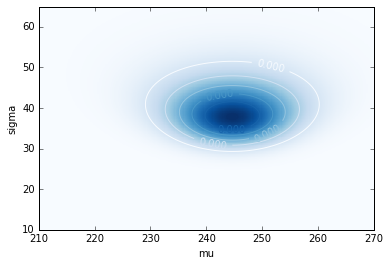

In [22]:
thinkplot.Contour(general, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

Next, extract the marginal distribution of `mu` from general.

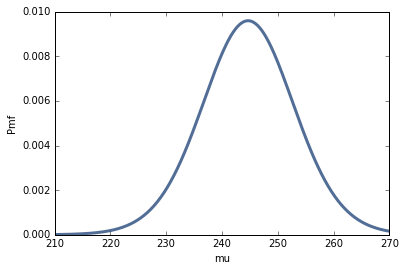

In [23]:
pmf_mu0 = general.Marginal(0)
thinkplot.Pdf(pmf_mu0)
thinkplot.Config(xlabel='mu', ylabel='Pmf')

And the marginal distribution of `sigma` from the general.

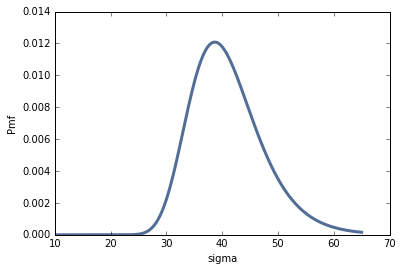

In [24]:
pmf_sigma0 = general.Marginal(1)
thinkplot.Pdf(pmf_sigma0)
thinkplot.Config(xlabel='sigma', ylabel='Pmf')

Next, we will run this again for BRINK and see what the difference is between the group. This will give us insight into whether or not Brink employee's are stealing parking money from the city.

First use the same range of `mus` and `sigmas` calcualte the marginal distributions of brink.

In [25]:
brink = Normal(product(mus, sigmas))
data = df[df.BRINK==1].RATIO
brink.Update(data)

5.1204633776438457e-49

Plot the `mus` and `sigmas` on a contour plot to see what is going on.

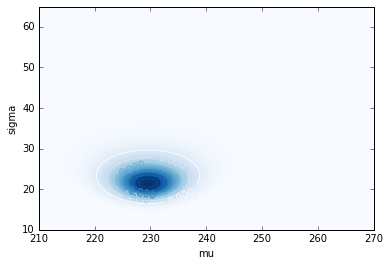

In [26]:
thinkplot.Contour(brink, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

Extract the marginal distributions of `mu` from brink.

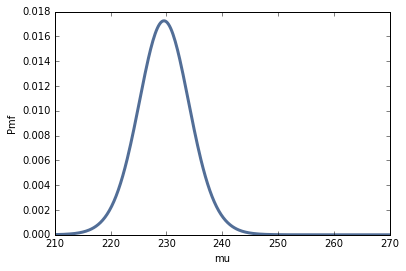

In [27]:
pmf_mu1 = brink.Marginal(0)
thinkplot.Pdf(pmf_mu1)
thinkplot.Config(xlabel='mu', ylabel='Pmf')

Extract the marginal distributions `sigma` from brink

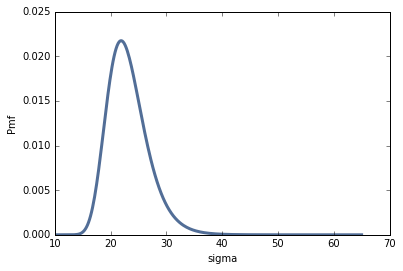

In [28]:
pmf_sigma1 = brink.Marginal(1)
thinkplot.Pdf(pmf_sigma1)
thinkplot.Config(xlabel='sigma', ylabel='Pmf')

From here, we want to compare the two distributions. To do this, we will start by taking the difference between the distributions.

In [29]:
pmf_diff = pmf_mu1 - pmf_mu0
pmf_diff.Mean()

-15.022318455572226

From here we can calculate the probability that money was stolen from the city.

0.93875832542936855

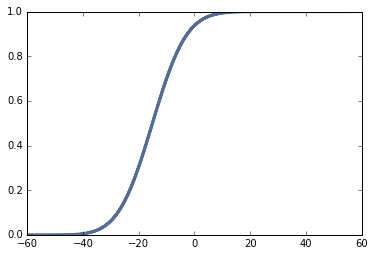

In [30]:
cdf_diff = pmf_diff.MakeCdf()
thinkplot.Cdf(cdf_diff)
cdf_diff[0]

So we can calculate that the probability money was stolen from the city is 93.9%

Next, we want to calculate how much money was stolen from the city. We first need to calculate how much money the city collected during Brink times. Then we can multiply this times our pmf_diff to get a probability distribution of potential stolen money.

(-3594455.9999999991, -1431125.9999999991)


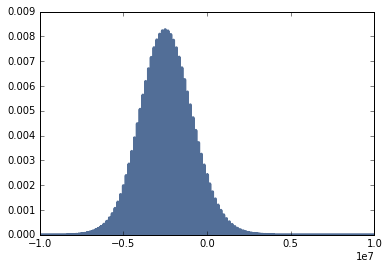

In [31]:
money_city = np.where(df['BRINK']==1, df['CITY'], 0).sum(0)
print((pmf_diff * money_city).CredibleInterval(50))
thinkplot.Pmf(pmf_diff * money_city)

Above we see a plot of stolen money in millions. We have also calculated a credible interval that tells us that there is a 50% chance that Brink stole between 1.4 to 3.6 million dollars.

In pursuit of more evidence, we find the probability that the standard deviation in the Brink collections is higher than that of the general contractors.

In [32]:
pmf_sigma1.ProbGreater(pmf_sigma0)

0.0050527025817088851

We see that there is an extremely low chance that the standard deviation that the Brink collections is higher than the general collections.

At this point, we have seemingly overwhelming evidence that Brink stole money from the city. I solved this problem using tools I learned in class. If I were to do this problem again, I would to it without calcualting the variance because the best evidence is to calculate if and how much money was stolen.

## Final project ideas

Over the past few weeks, I have dabbled into potential final projects. One of my ideas was to predict the content of tweets based on other words in the tweet. For example, if we were to update with word "emails" how does the probability change for the tweet to contain Hillary, Trump, or Hillary and Trump. I mined quite a bit of data over debate night but I'm not convinved that this is a particularly interesting project.